In [1]:
# imports
from qrisp.qaoa import QAOAProblem
from qrisp.qaoa.problems.create_rdm_graph import create_rdm_graph
from qrisp.qaoa.problems.maxCliqueInfrastr import maxCliqueCostfct, maxCliqueCostOp, init_state
from qrisp.qaoa.mixers import RX_mixer
from qrisp import QuantumVariable
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Create graph
G = nx.Graph()
G.add_edges_from([[0,3],[0,2],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
qarg = QuantumVariable(G.number_of_nodes())

In [3]:
# Create a QAOA instance
QAOAinstance = QAOAProblem(cost_operator= maxCliqueCostOp(G), mixer= RX_mixer, cl_cost_function=maxCliqueCostfct(G))
QAOAinstance.set_init_function(init_function=init_state)

In [4]:
# Run the QAOA instance
theNiceQAOA = QAOAinstance.run(qarg=qarg, depth= 4)

In [5]:
# Find the top 4 solutions
maxfour = sorted(theNiceQAOA, key=theNiceQAOA.get, reverse=True)[:4]

In [6]:
# Print the ideal solutions
print("4 most likely Solutions")
for res, val in theNiceQAOA.items():
    if res in maxfour:
        print((res, val))

4 most likely Solutions
('01111', 0.5918)
('01101', 0.1074)
('01011', 0.1074)
('10110', 0.0467)


NX solution
([4, 1, 2, 3], 4)


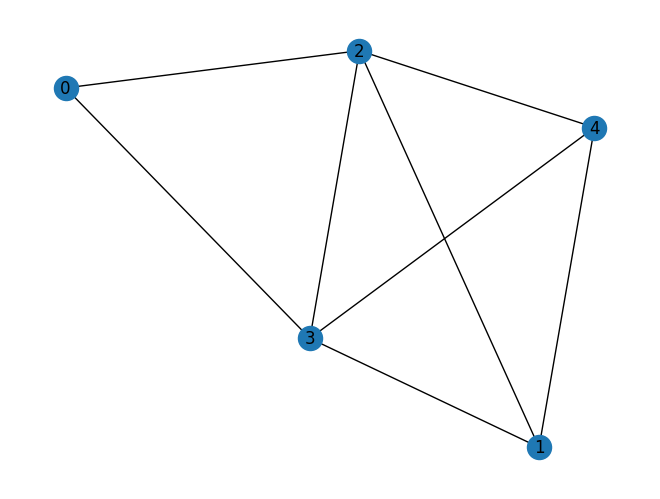

In [7]:
print("NX solution")
print(nx.max_weight_clique(G, weight = None))
#draw graph
# Create a list of colors for each node
# Solution nodes will have a different color, e.g., 'red'
# Other nodes will have a default color, e.g., 'blue'
nx.draw(G, with_labels=True)
plt.show()